# 2- Arnold Circle Map
We will study the 1D map on the circle

$$ \theta_{n+1} = \left[ \theta_{n} + \omega + \frac{\epsilon}{2\pi} \cos(2\pi\theta_n) \right] \text{mod}\,1 $$

This map is invertible for $|\epsilon| < 1$.

In [22]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from numba import jit,njit

## Plot of the circle function

In [59]:
@njit
def circle_func(theta,omega,eps):
    res = theta + omega + (eps/(2*np.pi))*np.cos(2*np.pi*theta)
    return res - np.int(res)
@njit
def circle_func_arr(theta,omega,eps):
    res = theta + omega + (eps/(2*np.pi))*np.cos(2*np.pi*theta)
    return res - res.astype(np.int32)

Text(0, 0.5, '$\\theta_{n+1}$')

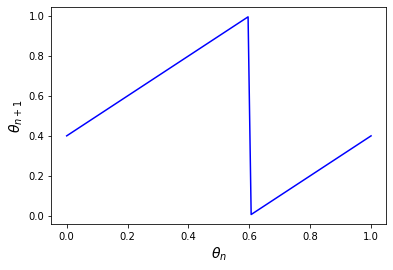

In [61]:
omega = 0.4
eps = 0.0

theta_vec = np.linspace(0,1,100)
theta2_vec = circle_func_arr(theta_vec,omega,eps)

plt.plot(theta_vec,theta2_vec,color='b')
plt.xlabel(r"$\theta_n$",fontsize=14)
plt.ylabel(r"$\theta_{n+1}$",fontsize=14)

## Iteration function



In [46]:
@njit
def iter_map(theta,omega,eps,num_iter):
    res = np.zeros(num_iter)
    res[0] = theta
    for ind in range(1,num_iter):
        res[ind] = circle_func(res[ind-1],omega,eps)
    return res
    

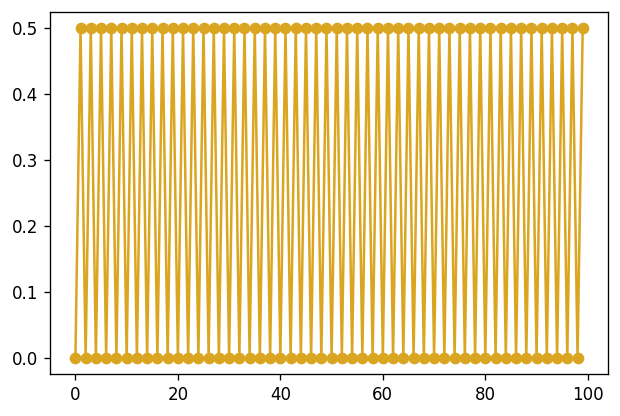

In [74]:
theta_0 = 0.0
omega = 0.5
eps = 0
num_iter = 100
theta_orbit = iter_map(theta_0,omega,eps,num_iter)

plt.figure(dpi=120)
plt.plot(np.arange(num_iter),theta_orbit,color='goldenrod',marker='o')

## Orbit diagram for changing $\omega$

In [78]:
omega_vec = np.linspace(0,1,500)
theta_0 = 0.1
eps = 0
num_iter = 100

theta_arr = []
for omega in omega_vec:
    theta_orbit = iter_map(theta_0,omega,eps,num_iter)
    theta_arr.append(theta_orbit)

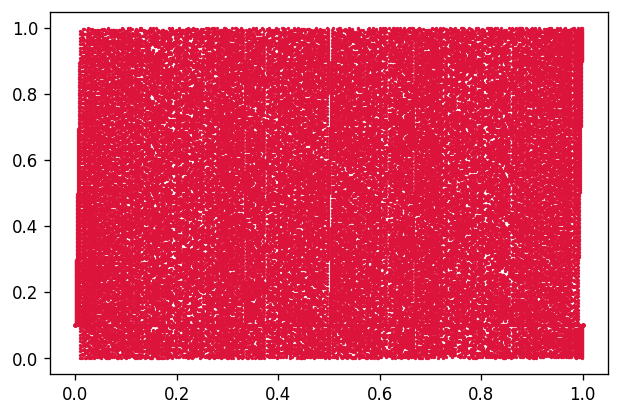

In [81]:
plt.figure(dpi=120)

for ind in range(len(omega_vec)):
    plt.scatter(omega_vec[ind]*np.ones(num_iter),theta_arr[ind],color='crimson',s=1)